In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('data/kericho_community_health_data.csv')

In [3]:
main_df.head()

,household_id,sub_county,ward,village,household_size,children_under5,women_reproductive_age,water_source,toilet_type,handwashing_facility,...,referrals_completed,barrier_to_care,births_last_month,deaths_last_month,migration_in,migration_out,health_education_sessions,community_cleanups,household_visits,data_reporting_month
0,KER-AIN-0001,Kipkelion East,Cheptororiet,Kapkembu,5,3,2,Piped,Pit latrine,Yes,...,2,NaN,0,0,0,0,2,0,22,2024-08
1,KER-AIN-0002,Kipkelion West,Kunyak,Kapsoit,2,0,0,Piped,Flush,Yes,...,0,NaN,0,0,0,0,2,1,30,2024-06
2,KER-BEL-0003,Bureti,Kipchebor,Kapkembu,4,1,0,Protected well,Pit latrine,Yes,...,0,NaN,0,0,0,0,2,1,17,2024-02
3,KER-KIP-0004,Kipkelion West,Cheptororiet,Kapkembu,6,0,1,Piped,Flush,Yes,...,0,Attitude,0,0,0,0,3,2,12,2024-09
4,KER-BUR-0005,Kipkelion West,Kunyak,Chemoiben,8,3,0,River,Flush,Yes,...,1,Cost,0,0,0,0,2,1,16,2024-10


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   household_id               5000 non-null   object
 1   sub_county                 5000 non-null   object
 2   ward                       5000 non-null   object
 3   village                    5000 non-null   object
 4   household_size             5000 non-null   int64 
 5   children_under5            5000 non-null   int64 
 6   women_reproductive_age     5000 non-null   int64 
 7   water_source               5000 non-null   object
 8   toilet_type                4487 non-null   object
 9   handwashing_facility       5000 non-null   object
 10  pregnant_women             5000 non-null   int64 
 11  anc_visits                 5000 non-null   int64 
 12  skilled_delivery           5000 non-null   object
 13  postnatal_visit            5000 non-null   int64 
 14  immuniza

###### toilet_type column has null values. These cells should be filled with 'No Toilet'         

In [5]:
# Fill missing values in 'toilet_type' with 'No Toilet'

main_df['toilet_type'] = main_df['toilet_type'].fillna('No Toilet')

In [6]:
# Convert 'data_reporting_month' to datetime

main_df['data_reporting_month'] = pd.to_datetime(main_df['data_reporting_month'])

##### Geographic distribution of households

       sub_county  num_of_households
0         Ainamoi                870
1          Belgut                803
2          Bureti                812
3  Kipkelion East                842
4  Kipkelion West                852
5    Soin-Sigowet                821


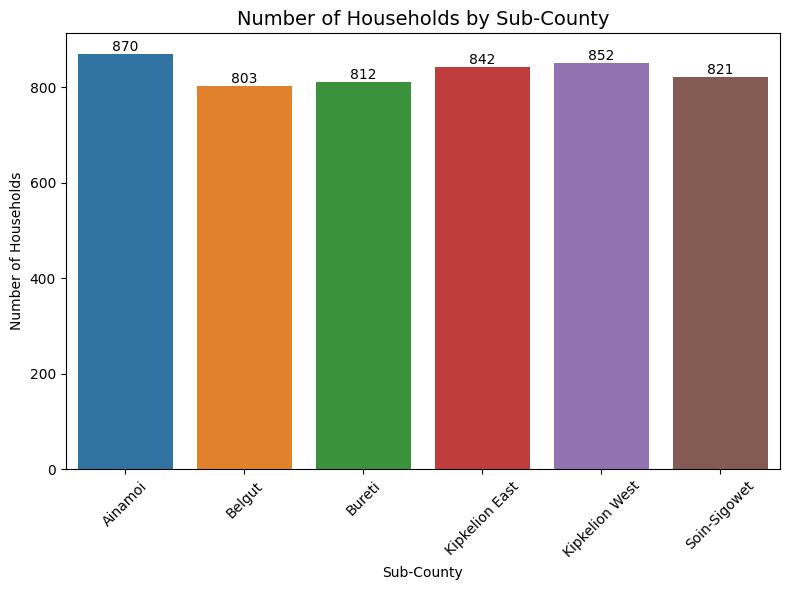

In [7]:
# Count of households by sub-county

households_per_subcounty = main_df.groupby('sub_county')['household_id'].nunique().reset_index()
households_per_subcounty.columns = ['sub_county', 'num_of_households']
print(households_per_subcounty)

# Visualize the Number of Households by Sub-County
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=households_per_subcounty, 
    x='sub_county', 
    y='num_of_households', 
    palette='tab10', 
    hue='sub_county'
    )
plt.title('Number of Households by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### The distribution of households across sub-counties in Kericho County is relatively even, with a slight variation where Ainamoi has the highest count and Belgut the lowest. This suggests that health resources, outreach, and services can be planned on a comparable scale for each sub-county, but it remains important to allocate slightly more resources to the more populous areas to ensure equitable access and effective outreach.

##### Summary statistics

In [8]:
# Overall

main_df.describe()

,household_size,children_under5,women_reproductive_age,pregnant_women,anc_visits,postnatal_visit,immunization_coverage,malnutrition_cases,malaria_cases,tb_screened,...,referrals_made,referrals_completed,births_last_month,deaths_last_month,migration_in,migration_out,health_education_sessions,community_cleanups,household_visits,data_reporting_month
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000
mean,5.038600,1.492200,0.997200,0.511800,2.006200,0.987600,75.08860,0.985600,1.218800,2.504200,...,1.501000,0.991400,0.049600,0.00900,0.026600,0.01940,2.512400,1.006800,24.552800,2024-06-19 07:53:45.600000
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,10.000000,2024-01-01 00:00:00
25%,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,63.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000,17.000000,2024-04-01 00:00:00
50%,5.000000,1.000000,1.000000,1.000000,2.000000,1.000000,75.00000,1.000000,1.000000,2.000000,...,2.000000,1.000000,0.000000,0.00000,0.000000,0.00000,2.000000,1.000000,24.000000,2024-07-01 00:00:00
75%,7.000000,2.000000,2.000000,1.000000,3.000000,2.000000,88.00000,2.000000,2.000000,4.000000,...,3.000000,2.000000,0.000000,0.00000,0.000000,0.00000,4.000000,2.000000,32.000000,2024-10-01 00:00:00
max,8.000000,3.000000,2.000000,1.000000,4.000000,2.000000,100.00000,2.000000,7.000000,5.000000,...,3.000000,2.000000,1.000000,1.00000,1.000000,1.00000,5.000000,2.000000,39.000000,2024-12-01 00:00:00
std,2.005471,1.107513,0.810014,0.499911,1.422451,0.814604,14.65329,0.818246,1.139116,1.720516,...,1.118682,0.820403,0.217139,0.09445,0.160927,0.13794,1.702241,0.805781,8.651299,NaN


In [9]:
# By sub_county

summary = (
    main_df.groupby('sub_county').agg(
        avg_household_size=('household_size', 'mean'),
        min_household_size=('household_size', 'min'),
        max_household_size=('household_size', 'max'),
        avg_children_under_5=('children_under5', 'mean'),
        min_children_under_5=('children_under5', 'min'),
        max_children_under_5=('children_under5', 'max'),
        avg_women_reproductive_age=('women_reproductive_age', 'mean'),
        min_women_reproductive_age=('women_reproductive_age', 'min'),
        max_women_reproductive_age=('women_reproductive_age', 'max')
    ).reset_index()
)
summary

,sub_county,avg_household_size,min_household_size,max_household_size,avg_children_under_5,min_children_under_5,max_children_under_5,avg_women_reproductive_age,min_women_reproductive_age,max_women_reproductive_age
0,Ainamoi,5.064368,2,8,1.432184,0,3,1.001149,0,2
1,Belgut,5.007472,2,8,1.523039,0,3,0.987547,0,2
2,Bureti,4.963054,2,8,1.492611,0,3,0.953202,0,2
3,Kipkelion East,5.073634,2,8,1.450119,0,3,1.027316,0,2
4,Kipkelion West,4.992958,2,8,1.505869,0,3,1.025822,0,2
5,Soin-Sigowet,5.127893,2,8,1.554202,0,3,0.985384,0,2


##### A. Resource distribution

     water_source  percentage
0           Piped       40.80
1  Protected well       28.78
2           River       19.82
3       Rainwater       10.60


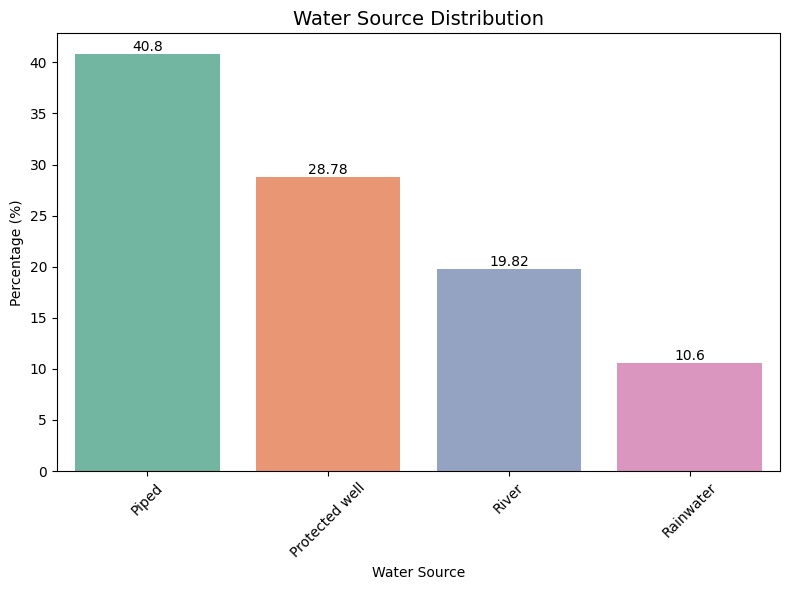

In [10]:
# Overall water source distribution

water_source_percentage = (main_df['water_source'].value_counts(normalize=True) * 100).reset_index()
water_source_percentage.columns = ['water_source', 'percentage']
print(water_source_percentage)

# Visualize the water source distribution
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=water_source_percentage, 
    x='water_source', 
    y='percentage', 
    palette='Set2',
    hue='water_source'
    )
plt.title('Water Source Distribution', fontsize=14)
plt.xlabel('Water Source')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### Most households rely on piped water and protected wells, but a significant minority still depend on rivers and rainwater, which can be less safe. Expanding access to piped water and protected sources should be prioritized, while targeted interventions for those using river and rainwater, such as treatment and education, can improve overall community health.​

        sub_county    water_source  count  percentage
0          Ainamoi           Piped    358       41.15
1          Ainamoi  Protected well    239       27.47
2          Ainamoi       Rainwater     72        8.28
3          Ainamoi           River    201       23.10
4           Belgut           Piped    311       38.73
5           Belgut  Protected well    243       30.26
6           Belgut       Rainwater     96       11.96
7           Belgut           River    153       19.05
8           Bureti           Piped    318       39.16
9           Bureti  Protected well    230       28.33
10          Bureti       Rainwater    103       12.68
11          Bureti           River    161       19.83
12  Kipkelion East           Piped    346       41.09
13  Kipkelion East  Protected well    244       28.98
14  Kipkelion East       Rainwater     89       10.57
15  Kipkelion East           River    163       19.36
16  Kipkelion West           Piped    360       42.25
17  Kipkelion West  Protecte

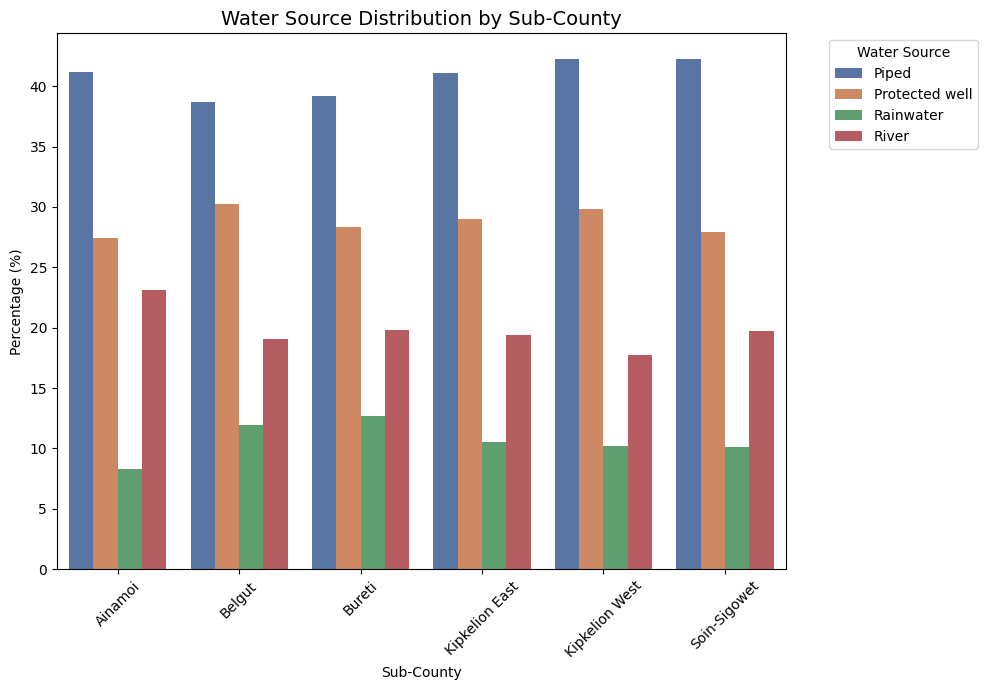

In [11]:
# Water distribution by sub-county
water_source_by_subcounty = (
    main_df.groupby(['sub_county', 'water_source'])
    .size()
    .reset_index(name='count')
)
water_source_by_subcounty['percentage'] = (
    water_source_by_subcounty
    .groupby('sub_county')['count']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)
print(water_source_by_subcounty)

# Visualize water source distribution by sub-county
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=water_source_by_subcounty, 
    x='sub_county', 
    y='percentage', 
    hue='water_source', 
    palette='deep')
plt.title('Water Source Distribution by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Water Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### Piped water is the most common source across all sub-counties, but substantial numbers of households still depend on protected wells, rivers, and rainwater. This indicates a need to strengthen infrastructure for piped water supply in all sub-counties while also providing targeted support, such as water safety interventions and resource allocation, for areas where reliance on less safe sources remains high.​

   toilet_type  percentage
0  Pit latrine       58.96
1        Flush       30.78
2    No Toilet       10.26


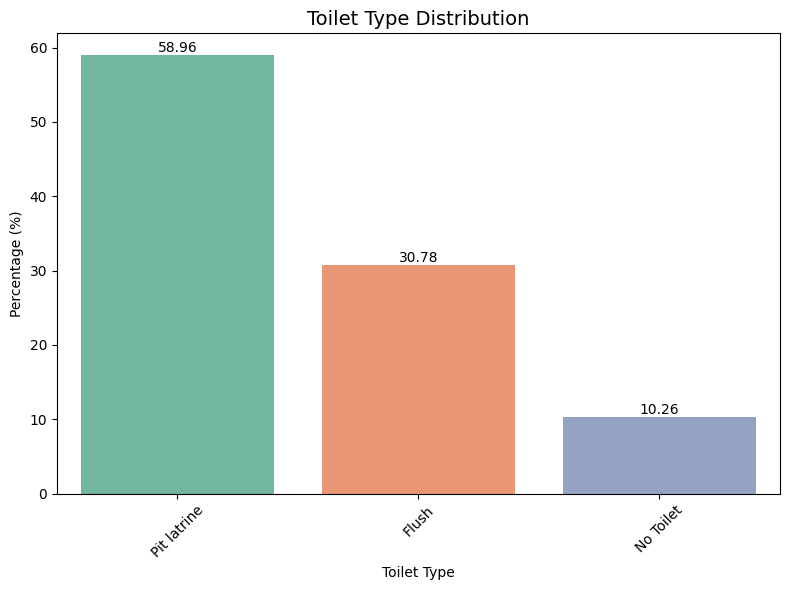

In [12]:
# Overall toilet type distribution

toilet_type_percentage = (main_df['toilet_type'].value_counts(normalize=True) * 100).reset_index()
toilet_type_percentage.columns = ['toilet_type', 'percentage']
print(toilet_type_percentage)

# Visualize the toilet type distribution
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=toilet_type_percentage, 
    x='toilet_type', 
    y='percentage', 
    palette='Set2',
    hue='toilet_type', 
    dodge=False)
plt.title('Toilet Type Distribution', fontsize=14)
plt.xlabel('Toilet Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### The majority of households use pit latrines, while a significant portion still relies on flush toilets and about 10% have no toilet at all. Efforts should focus on improving access to safe sanitation for those without toilets and upgrading existing pit latrines, which can lead to better community health and reduced risk of sanitation-related diseases.

        sub_county  toilet_type  count  percentage
0          Ainamoi        Flush    272       31.26
1          Ainamoi    No Toilet     85        9.77
2          Ainamoi  Pit latrine    513       58.97
3           Belgut        Flush    227       28.27
4           Belgut    No Toilet     88       10.96
5           Belgut  Pit latrine    488       60.77
6           Bureti        Flush    258       31.77
7           Bureti    No Toilet     84       10.34
8           Bureti  Pit latrine    470       57.88
9   Kipkelion East        Flush    248       29.45
10  Kipkelion East    No Toilet     94       11.16
11  Kipkelion East  Pit latrine    500       59.38
12  Kipkelion West        Flush    266       31.22
13  Kipkelion West    No Toilet     85        9.98
14  Kipkelion West  Pit latrine    501       58.80
15    Soin-Sigowet        Flush    268       32.64
16    Soin-Sigowet    No Toilet     77        9.38
17    Soin-Sigowet  Pit latrine    476       57.98


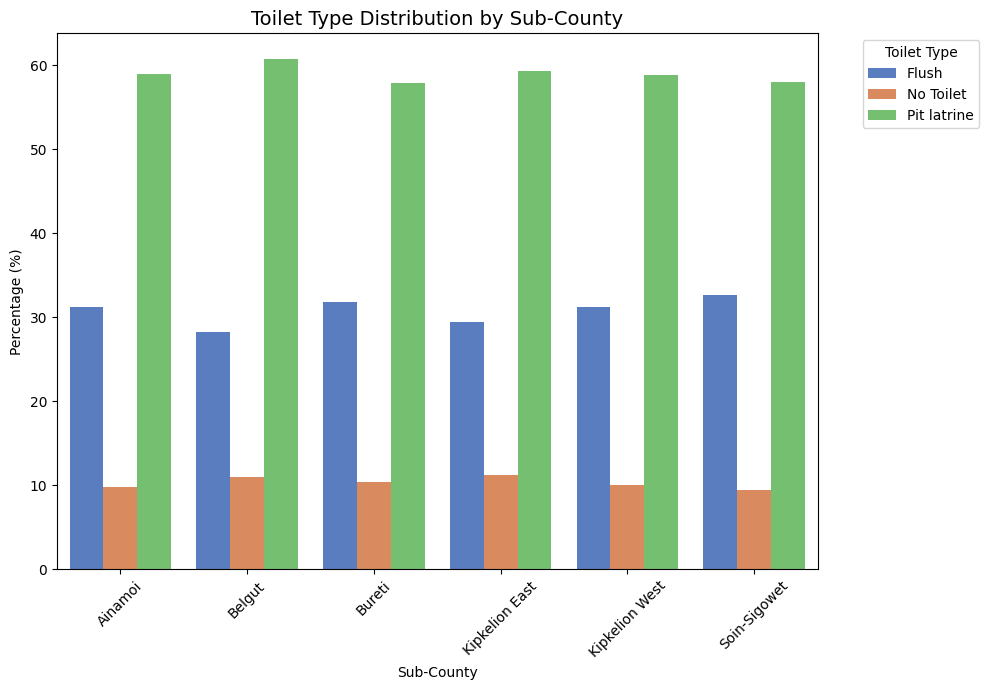

In [13]:
# Water distribution by sub-county
toilet_type_by_subcounty = (
    main_df.groupby(['sub_county', 'toilet_type'])
    .size()
    .reset_index(name='count')
)

toilet_type_by_subcounty['percentage'] = (
    toilet_type_by_subcounty
    .groupby('sub_county')['count']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

print(toilet_type_by_subcounty)

# Visualize water source distribution by sub-county
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=toilet_type_by_subcounty, 
    x='sub_county', 
    y='percentage', 
    hue='toilet_type', 
    palette='muted')
plt.title('Toilet Type Distribution by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Toilet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### The chart indicates that pit latrines are the predominant toilet type across all sub-counties, while flush toilets are less common and a notable minority of households still have no toilet access. Interventions should focus on improving sanitation by increasing access to flush toilets where feasible and prioritizing support for households with no toilets to reduce health risks and enhance overall community hygiene.

  handwashing_facility  percentage
0                  Yes       69.86
1                   No       30.14


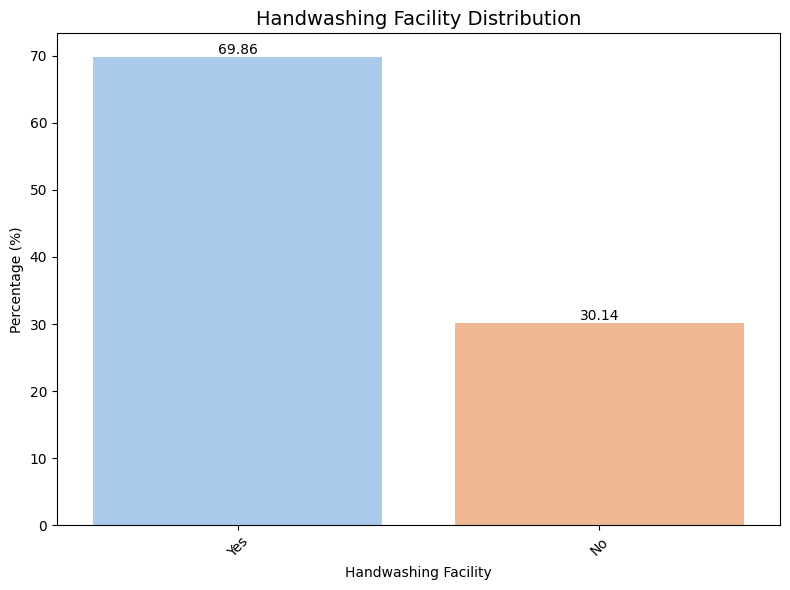

In [14]:
# Overall handwashing facilities distribution

handwashing_facility_percentage = (main_df['handwashing_facility'].value_counts(normalize=True) * 100).reset_index()
handwashing_facility_percentage.columns = ['handwashing_facility', 'percentage']
print(handwashing_facility_percentage)

# Visualize the handwashing facility distribution
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=handwashing_facility_percentage, 
    x='handwashing_facility', 
    y='percentage', 
    palette='pastel',
    hue='handwashing_facility', 
    dodge=False)
plt.title('Handwashing Facility Distribution', fontsize=14)
plt.xlabel('Handwashing Facility')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### While most households have a handwashing facility, nearly a third still lack one. To reduce the risk of disease transmission and improve hygiene, local programs should prioritize increasing access to handwashing facilities for these underserved households. 

        sub_county handwashing_facility  count  percentage
0          Ainamoi                   No    251       28.85
1          Ainamoi                  Yes    619       71.15
2           Belgut                   No    246       30.64
3           Belgut                  Yes    557       69.36
4           Bureti                   No    254       31.28
5           Bureti                  Yes    558       68.72
6   Kipkelion East                   No    252       29.93
7   Kipkelion East                  Yes    590       70.07
8   Kipkelion West                   No    247       28.99
9   Kipkelion West                  Yes    605       71.01
10    Soin-Sigowet                   No    257       31.30
11    Soin-Sigowet                  Yes    564       68.70


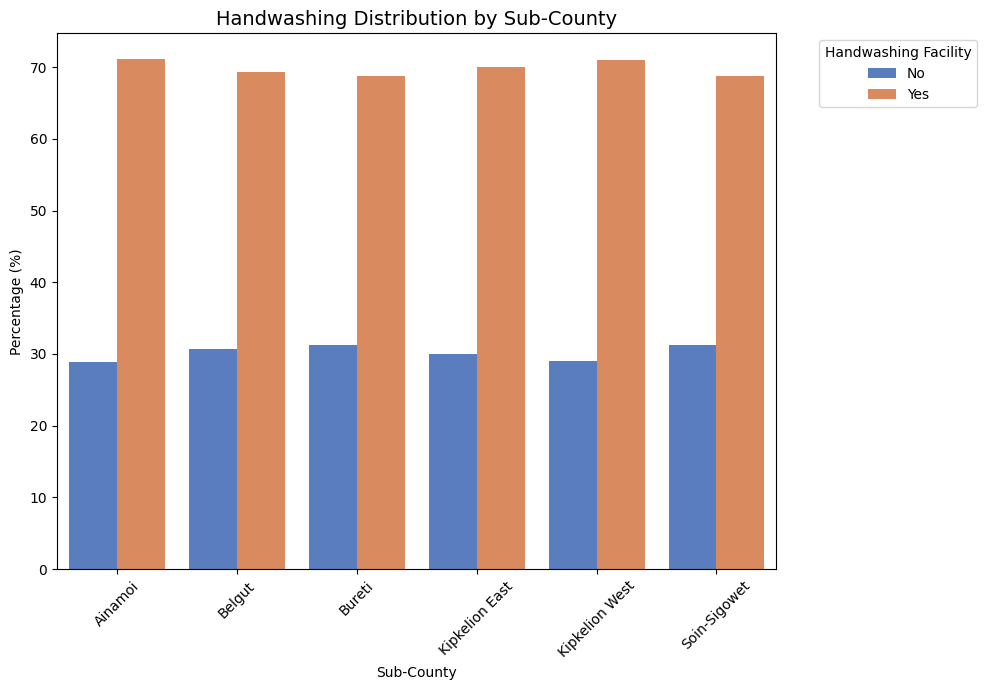

In [15]:
# Water distribution by sub-county
handwashing_facility_by_subcounty = (
    main_df.groupby(['sub_county', 'handwashing_facility'])
    .size()
    .reset_index(name='count')
)

handwashing_facility_by_subcounty['percentage'] = (
    handwashing_facility_by_subcounty
    .groupby('sub_county')['count']
    .transform(lambda x: (x / x.sum()) * 100)
    .round(2)
)

print(handwashing_facility_by_subcounty)

# Visualize water source distribution by sub-county
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=handwashing_facility_by_subcounty, 
    x='sub_county', 
    y='percentage', 
    hue='handwashing_facility', 
    palette='muted')
plt.title('Handwashing Distribution by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Handwashing Facility', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### In every sub-county, most households have handwashing facilities, but roughly 30% do not, indicating a persistent public health gap across all regions. Action should be taken to broaden access to handwashing facilities, especially targeting the consistent minority in each sub-county that remains underserved, to improve hygiene and reduce disease risk.

##### B. Health service utilization

In [16]:
# Overall distribution of pregnant women attending ANC visits

pregnant_df = main_df[main_df['pregnant_women'] > 0]
at_least_one_anc = (pregnant_df['anc_visits'] >= 1).sum()
total_pregnant = len(pregnant_df)
percentage_at_least_one_anc = (at_least_one_anc / total_pregnant) * 100
print(f'Percentage of pregnant women with at least one ANC visit: {percentage_at_least_one_anc:.2f}%')

Percentage of pregnant women with at least one ANC visit: 79.37%


###### While a majority of pregnant women are accessing antenatal care services at least once, about 20% are not receiving any ANC. Interventions should therefore focus on reaching this underserved group to promote universal ANC attendance, which is crucial for early risk detection, counselling, and improving maternal and newborn outcomes.

       sub_county  percentage_at_least_one_anc
0         Ainamoi                        78.41
1          Belgut                        76.37
2          Bureti                        79.02
3  Kipkelion East                        78.70
4  Kipkelion West                        80.09
5    Soin-Sigowet                        83.70


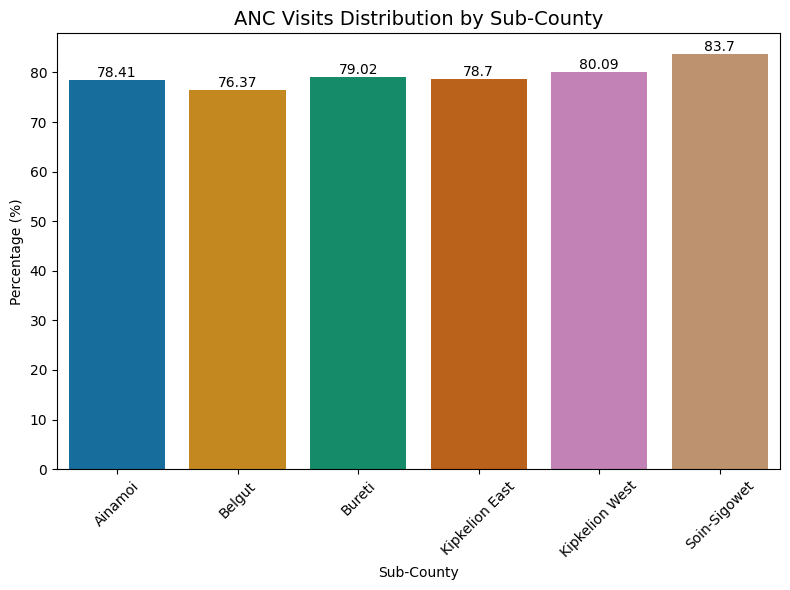

In [17]:
# Distribution of pregnant women attending ANC visits per sub-county

anc_visits_per_subcounty = (
    pregnant_df.groupby('sub_county')['anc_visits']
    .apply(lambda x: (x >= 1).sum() / len(x) * 100)
    .reset_index(name='percentage_at_least_one_anc').round(2)
)
print(anc_visits_per_subcounty)

# Visualize ANC visits distribution by sub-county
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=anc_visits_per_subcounty, 
    x='sub_county', 
    y='percentage_at_least_one_anc', 
    palette='colorblind',
    hue='sub_county', 
    dodge=False)
plt.title('ANC Visits Distribution by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### While ANC attendance rates are generally high across all sub-counties, there are noticeable differences, with Belgut and Ainamoi slightly below the others. Interventions should target these sub-counties for outreach and education to raise ANC coverage, ensuring equitable access to maternal health services and reducing missed care opportunities in areas with lower attendance.

  skilled_delivery  percentage
0              Yes       83.74
1               No       16.26


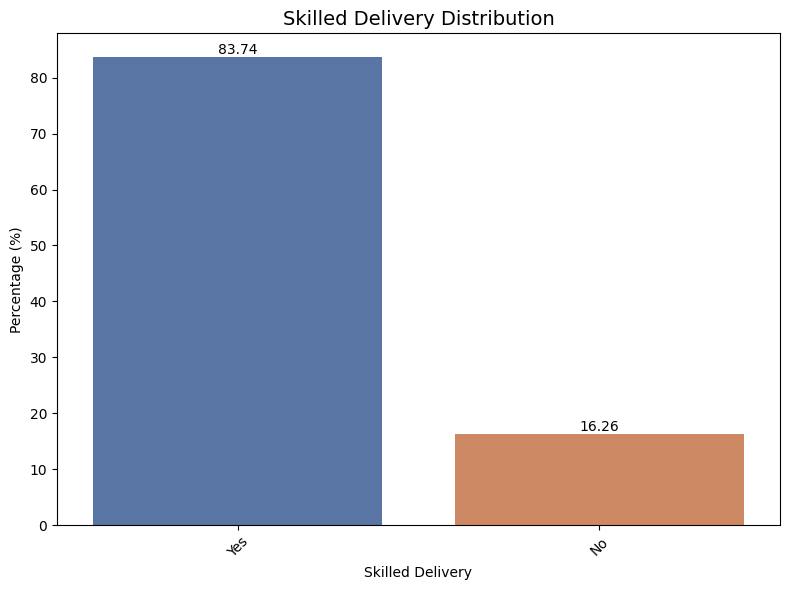

In [18]:
# Overall distribution of skilled deliveries

skilled_delivery_percentage = (main_df['skilled_delivery'].value_counts(normalize=True) * 100).round(2).reset_index()
skilled_delivery_percentage.columns = ['skilled_delivery', 'percentage']
print(skilled_delivery_percentage)

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=skilled_delivery_percentage,
    x='skilled_delivery', 
    y='percentage', 
    palette='deep',
    hue='skilled_delivery', 
    dodge=False)
plt.title('Skilled Delivery Distribution', fontsize=14)
plt.xlabel('Skilled Delivery')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### While most deliveries are attended by skilled personnel (83.74%), a significant minority (16.26%) are not, indicating an urgent need to target the barriers to skilled birth attendance. Prioritizing resources, outreach, and awareness campaigns for regions or groups with low skilled delivery rates is essential to improve maternal and newborn health outcomes.

        sub_county skilled_delivery  percentage
0          Ainamoi               No       15.17
1          Ainamoi              Yes       84.83
2           Belgut               No       15.94
3           Belgut              Yes       84.06
4           Bureti               No       17.98
5           Bureti              Yes       82.02
6   Kipkelion East               No       16.39
7   Kipkelion East              Yes       83.61
8   Kipkelion West               No       17.37
9   Kipkelion West              Yes       82.63
10    Soin-Sigowet               No       14.74
11    Soin-Sigowet              Yes       85.26


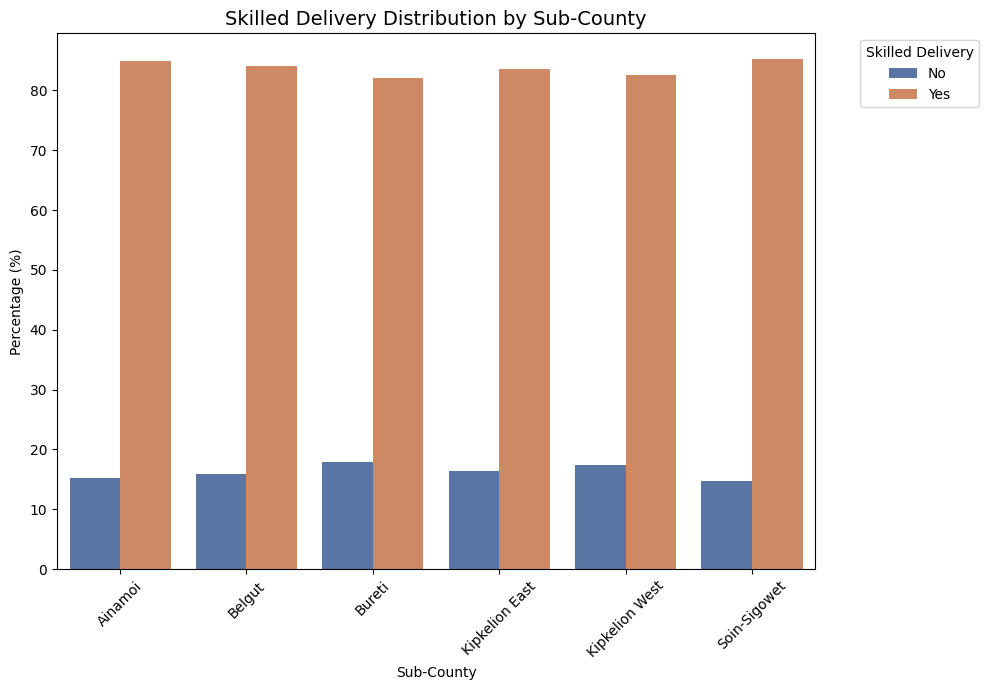

In [19]:
# Distribution of skilled deliveries by sub-county

count_per_group = main_df.groupby(['sub_county', 'skilled_delivery']).size()
total_per_subcounty = main_df.groupby('sub_county').size()
percentage_per_subcounty = (100 * (count_per_group / total_per_subcounty)).reset_index(name='percentage').round(2)
print(percentage_per_subcounty)

# Visualize skilled delivery distribution by sub-county
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=percentage_per_subcounty,
    x='sub_county', 
    y='percentage',
    hue='skilled_delivery', 
    palette='deep')
plt.title('Skilled Delivery Distribution by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Skilled Delivery', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### Skilled delivery rates are high across all sub-counties, but 15–18% of births still occur without skilled personnel in every region. Actionable steps should include targeting each sub-county with strategies to address barriers to skilled birth attendance, aiming for universal skilled delivery and reducing risks associated with unassisted births.

In [20]:
# Overall distribution of postnatal visits

postnatal_df = main_df[main_df['postnatal_visit'] > 0]
at_least_one_postnatal = (main_df['postnatal_visit'] >= 1).sum()
total_households = len(main_df)
percentage_at_least_one_postnatal = (at_least_one_postnatal / total_households) * 100

print(f'Percentage of households with at least one postnatal visit: {percentage_at_least_one_postnatal:.2f}%')

Percentage of households with at least one postnatal visit: 66.20%


###### While two-thirds of households are receiving postnatal care, a significant one-third are still missing out. Efforts should be directed towards identifying and supporting households that do not access postnatal visits to ensure that all mothers and newborns receive necessary follow-up care for improved health outcomes.

       sub_county  percentage_at_least_one_postnatal
0         Ainamoi                              66.32
1          Belgut                              64.01
2          Bureti                              66.38
3  Kipkelion East                              68.53
4  Kipkelion West                              66.55
5    Soin-Sigowet                              65.29


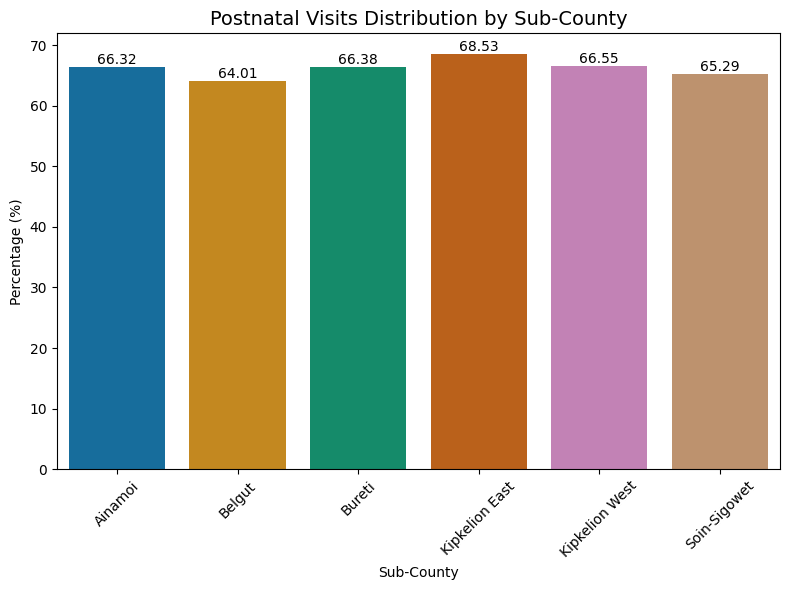

In [21]:
# Distribution of postnatal visits by sub-county
percentage_postnatal_per_subcounty = (
    main_df.groupby('sub_county')['postnatal_visit']
    .apply(lambda x: (x >= 1).sum() / len(x) * 100)
    .reset_index(name='percentage_at_least_one_postnatal')
    .round(2)
)
print(percentage_postnatal_per_subcounty)

# Visualize postnatal visits distribution by sub-county
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=percentage_postnatal_per_subcounty,
    x='sub_county', 
    y='percentage_at_least_one_postnatal',
    palette='colorblind',
    hue='sub_county'
    )
plt.title('Postnatal Visits Distribution by Sub-County', fontsize=14)   
plt.xlabel('Sub-County')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### Postnatal care attendance is fairly consistent across all sub-counties, ranging from 64% to 69%. However, this means about one-third of households in every sub-county still do not access postnatal services. Local health programs should prioritize outreach to these underserved households to ensure all mothers and newborns receive critical postnatal follow-up.

In [22]:
# Overall average immunization coverage rates

avg_immunization_coverage = main_df['immunization_coverage'].mean().round(2)
print(f'Average Immunization Coverage Rate: {avg_immunization_coverage}%')

Average Immunization Coverage Rate: 75.09%


###### With an average immunization coverage rate of 75.09%, a quarter of the population remains vulnerable to preventable diseases. To achieve herd immunity and reduce outbreaks, targeted efforts should be focused on increasing vaccine outreach and accessibility, prioritizing areas or groups with low coverage.

       sub_county  avg_immunization_coverage
0         Ainamoi                      75.90
1          Belgut                      74.48
2          Bureti                      74.58
3  Kipkelion East                      75.50
4  Kipkelion West                      75.00
5    Soin-Sigowet                      75.00


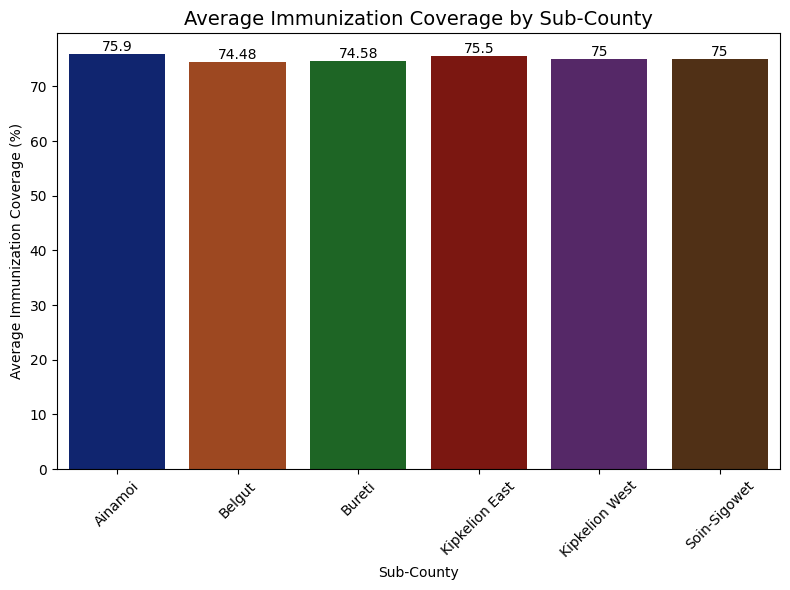

In [23]:
# Average immunization coverage rates by sub-county

avg_immunization_by_subcounty = (
    main_df.groupby('sub_county')['immunization_coverage']
    .mean()
    .reset_index().round(2)
)
avg_immunization_by_subcounty.columns = ['sub_county', 'avg_immunization_coverage']
print(avg_immunization_by_subcounty)

# Visualize average immunization coverage by sub-county
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=avg_immunization_by_subcounty, 
    x='sub_county',
    y='avg_immunization_coverage', 
    palette='dark',
    hue='sub_county'
    )
plt.title('Average Immunization Coverage by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Average Immunization Coverage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### Immunization coverage is consistently moderate across all sub-counties, ranging from 74.48% to 75.9%. Since a significant portion of children remain unimmunized throughout the area, prioritizing intensified efforts, targeted outreach, and education campaigns in every sub-county will be key to improving vaccine coverage and protecting community health.

##### D. Disease incidence and screening

In [24]:
# Overall malnutrition incidence rate

malnutrition_incidence_rate = main_df['malnutrition_cases'].sum() / main_df['children_under5'].sum() * 100
print(f'Overall Malnutrition Incidence Rate: {malnutrition_incidence_rate:.2f}%')

Overall Malnutrition Incidence Rate: 66.05%


###### An overall malnutrition incidence rate of 66.05% signals a serious public health concern. This means that roughly two-thirds of the surveyed population is affected by malnutrition. Immediate targeted interventions are needed, such as scaling up nutrition programs, improving food security, and prioritizing at-risk groups to reduce this high rate and improve community well-being. Routine monitoring and evaluation should follow to track progress and ensure resources are reaching those most in need.

       sub_county  malnutrition_incidence_rate
0         Ainamoi                        69.66
1          Belgut                        66.48
2          Bureti                        65.76
3  Kipkelion East                        68.30
4  Kipkelion West                        65.32
5    Soin-Sigowet                        60.97


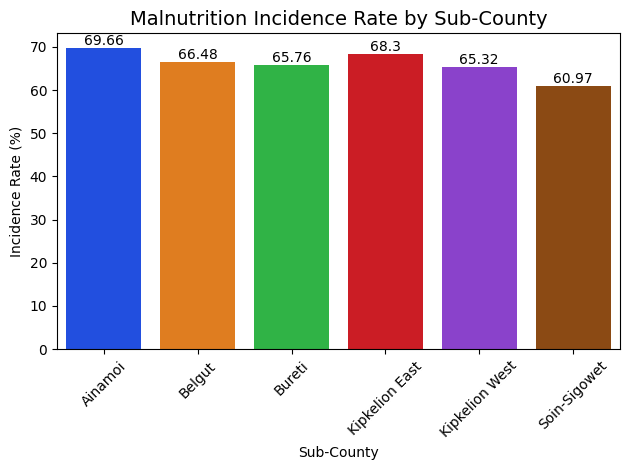

In [26]:
# Malnutrition incidence rate by sub-county

malnutrition_group = main_df.groupby('sub_county')
malnutrition_incidence_rate = (
    malnutrition_group['malnutrition_cases'].sum() / malnutrition_group['children_under5'].sum() * 100
).reset_index(name='malnutrition_incidence_rate').round(2)
print(malnutrition_incidence_rate)

# Visualize malnutrition incidence rate by sub-county
ax = sns.barplot(
    data=malnutrition_incidence_rate, 
    x='sub_county', 
    y='malnutrition_incidence_rate', 
    palette='bright',
    hue='sub_county'
    )
plt.title('Malnutrition Incidence Rate by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Incidence Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### Malnutrition incidence rates are high across all sub-counties, with values ranging from 60.97% in Soin-Sigowet to 69.66% in Ainamoi. This indicates that malnutrition is a widespread and serious concern throughout the region, not limited to a single sub-county. The actionable insight is to prioritize comprehensive nutrition interventions across all sub-counties, with particular focus on those with the highest rates like Ainamoi and Kipkelion East. Ongoing monitoring and tailored strategies are needed to reduce these persistently high rates and address the underlying causes in each community.

       sub_county  malaria_incidence_per_1000_people
0         Ainamoi                             247.16
1          Belgut                             242.73
2          Bureti                             248.88
3  Kipkelion East                             239.70
4  Kipkelion West                             240.71
5    Soin-Sigowet                             232.30


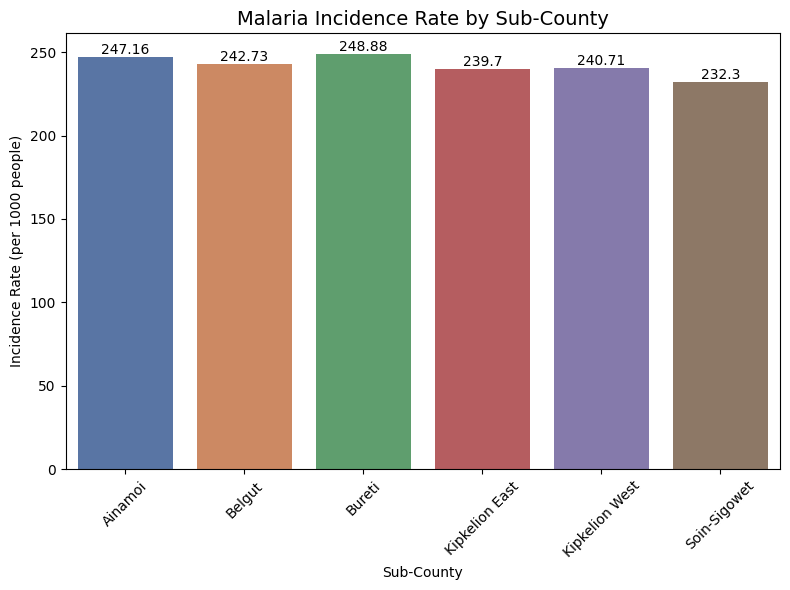

In [33]:
# Overall malaria incidences

malaria_group = main_df.groupby('sub_county')
malaria_incidence_rate = (
    malnutrition_group['malaria_cases'].sum() / malaria_group['household_size'].sum() * 1000 # Malaria incidence are measured per 1000 people
).reset_index(name='malaria_incidence_per_1000_people').round(2)
print(malaria_incidence_rate)

# Visualize malaria incidence rate by sub-county
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=malaria_incidence_rate, 
    x='sub_county', 
    y='malaria_incidence_per_1000_people', 
    palette='deep',
    hue='sub_county'
    )
plt.title('Malaria Incidence Rate by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Incidence Rate (per 1000 people)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### Malaria incidence rates are high and quite similar across all sub-counties, ranging from 232.3 to 248.88 cases per 1,000 people. This widespread and consistently elevated burden suggests that malaria control efforts should be implemented countywide, rather than targeting only specific areas. Targeted interventions may still be needed in sub-counties with the very highest rates, such as Bureti and Ainamoi, but overall, comprehensive prevention and treatment strategies—such as increasing access to bed nets, diagnostics, and prompt treatment—are needed throughout the region to reduce malaria incidence.

In [28]:
# TB screening rate

tb_screening_rate = (main_df['tb_screened'].sum() / main_df['household_size'].sum() * 100).round(2)
print(f'The overall tb screening rate is {tb_screening_rate:.2f}%')

The overall tb screening rate is 49.70%


###### An overall TB screening rate of 49.7% indicates that just under half of the population is being screened for tuberculosis. This coverage is relatively low, signalling the need to expand screening efforts to ensure earlier detection and treatment. The actionable insight is to strengthen TB outreach, awareness campaigns, and access to screening services so that a greater proportion of the population is reached, reducing the risk of undiagnosed cases and transmission.

       sub_county  tb_screening_rate
0         Ainamoi              49.00
1          Belgut              51.36
2          Bureti              49.88
3  Kipkelion East              50.70
4  Kipkelion West              48.90
5    Soin-Sigowet              48.48


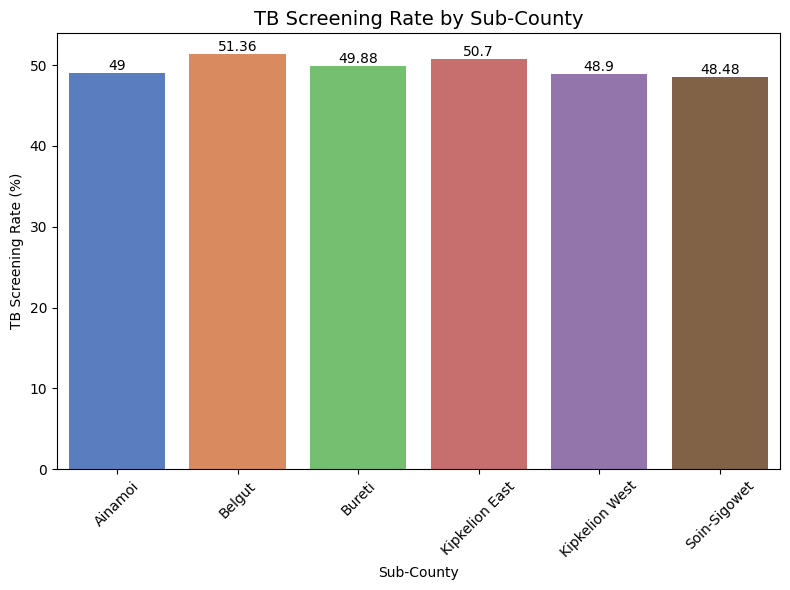

In [30]:
# TB screening rate by sub_county

tb_screened_by_subcounty = main_df.groupby('sub_county')['tb_screened'].sum()
household_size_by_subcounty = main_df.groupby('sub_county')['household_size'].sum()
tb_screening_rate_by_subcounty = ((tb_screened_by_subcounty / household_size_by_subcounty) * 100).reset_index(name='tb_screening_rate').round(2)
print(tb_screening_rate_by_subcounty)

# Visualize TB screening rate by sub-county
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=tb_screening_rate_by_subcounty, 
    x='sub_county', 
    y='tb_screening_rate', 
    palette='muted',
    hue='sub_county'
    )
plt.title('TB Screening Rate by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('TB Screening Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### TB screening rates are consistently low across all sub-counties, ranging from 48.48% to 51.36%. This means that about half the population in each sub-county is not being screened for tuberculosis, leaving many cases potentially undiagnosed. The actionable insight is to increase TB screening efforts countywide, prioritizing awareness campaigns, improving access to screening facilities, and addressing barriers in sub-counties with the lowest rates such as Soin-Sigowet and Kipkelion West. Comprehensive outreach can help boost early detection and reduce the risk of TB transmission.

In [36]:
# Overall TB incidence rate

tb_incidence_rate = (main_df['tb_suspected'].sum() / main_df['household_size'].sum() * 100000).round(2)  # TB incidence per 100000 people. Rare diseases are measured per 100000 people
print(f'The overall TB incidence is {tb_incidence_rate:.2f} per 100,000 people.')

The overall TB incidence is 1024.09 per 100,000 people.


###### An overall TB incidence rate of 1,024.09 per 100,000 people is extremely high and signals a significant public health concern. The actionable insight is to urgently strengthen TB prevention, early detection, and treatment programs across the population. Health authorities should prioritize expanded screening, community education, and rapid treatment access to reduce TB transmission and incidence rates, and also investigate and address underlying factors contributing to such a high disease burden.

       sub_county  tb_incidence_rate_per_100000_people
0         Ainamoi                              1157.51
1          Belgut                              1268.34
2          Bureti                              1191.07
3  Kipkelion East                               936.33
4  Kipkelion West                               940.29
5    Soin-Sigowet                               665.08


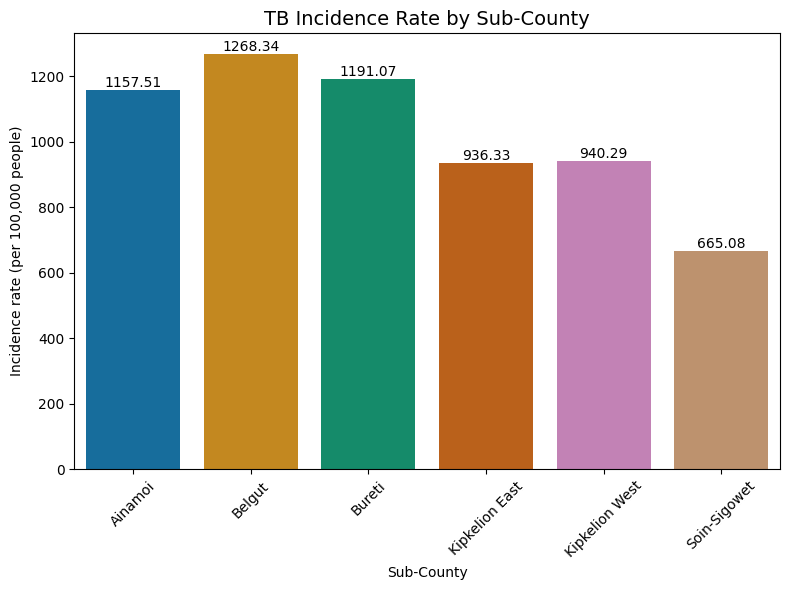

In [35]:
# TB incidence rate by sub_county 

tb_suspected_by_subcounty = main_df.groupby('sub_county')['tb_suspected'].sum()
population_by_subcounty = main_df.groupby('sub_county')['household_size'].sum()
tb_incidence_rate_by_subcounty = ((tb_suspected_by_subcounty / population_by_subcounty) * 100000).reset_index(name='tb_incidence_rate_per_100000_people').round(2)
print(tb_incidence_rate_by_subcounty)

# Visualize TB incidence rate by sub-county
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=tb_incidence_rate_by_subcounty, 
    x='sub_county', 
    y='tb_incidence_rate_per_100000_people', 
    palette='colorblind',
    hue='sub_county'
    )
plt.title('TB Incidence Rate by Sub-County', fontsize=14)
plt.xlabel('Sub-County')
plt.ylabel('Incidence rate (per 100,000 people)')
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fontsize=10, label_type='edge')
plt.show()

###### TB incidence rates vary significantly across sub-counties, ranging from about 665 cases per 100,000 people in Soin-Sigowet to 1,268 in Belgut. Sub-counties like Belgut, Bureti, and Ainamoi have particularly high TB incidence rates above 1,100 per 100,000, indicating hotspots with elevated transmission and disease burden. Targeted TB control efforts should prioritize the highest-incidence sub-counties (Belgut, Bureti, Ainamoi) by intensifying screening, treatment access, and preventive measures there. Meanwhile, sustained efforts are also needed in other sub-counties to reduce the incidence and prevent future outbreaks. Resource allocation and intervention planning should reflect these geographic disparities to maximize impact.